**Equipo 23**

* **Owen Jáuregui Borbón - A01638122**
* **Luis Ángel Seda Marcos - A01795301**
* **Eduardo Rodrigo Silva Orozco - A01795937**
* **Gerardo Solís Hernández - A00952702**
* **José Adán Vega Pérez - A01796093**

# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [517]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [518]:
# Path relative to execution environment, Colab
train_df = pd.read_csv('sign_mnist_train.csv')
valid_df = pd.read_csv('sign_mnist_valid.csv')

In [519]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Importar Images

In [520]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [521]:
def split_val_test(x, y, pct=0.5, shuffle=True):
  # Verify e & y lengths match
  if len(x) != len(y):
    raise ValueError("Las longitudes de x e y deben coincidir")
  # Suffle if required
  if shuffle:
    indices = np.random.permutation(len(x))
    x, y = x[indices], y[indices]
  # Split index per pct, ptc=val_size, verify ptc valid percentage
  if not 0 <= pct <= 1:
    raise ValueError("El porcentaje pct debe estar entre 0 y 1")
  split_idx = int(len(x)*pct)
  # Divide
  x_val_split, x_test_split = x[:split_idx], x[split_idx:]
  y_val_split, y_test_split = y[:split_idx], y[split_idx:]
  return x_val_split, y_val_split, x_test_split, y_test_split


In [522]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

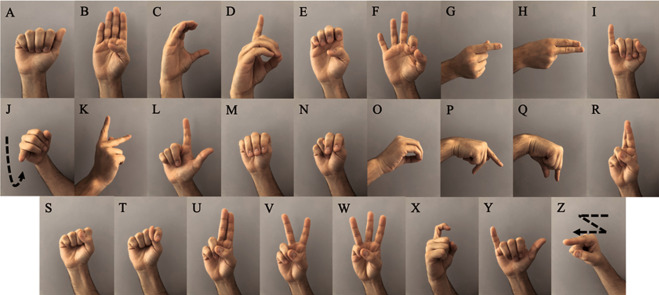

In [523]:
## Matching numeric values to Kaggle ASL Dataset
alphabet=list(string.ascii_lowercase)
# Remove J &^Z since they are movements
alphabet.remove('j')
alphabet.remove('z')
print("Total number of classes:",len(alphabet))

Total number of classes: 24


### Normalize

In [524]:
# Based on Activity1a:
def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std
# mean from train data
x_mean = x_train.mean()
# standard deviation from train data
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train) # normalize train with train data
x_val = normalise(x_mean, x_std, x_val)     # normalize val with train data
x_test = normalise(x_mean, x_std, x_test)   # normalize test with train data

### Graficar muestras

La imagen muestreada representa un: 8


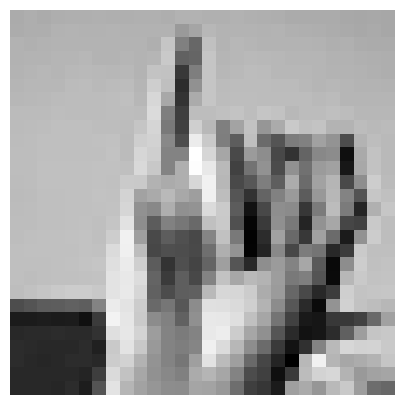

In [525]:
# Based on Activity1a
def plot_number(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

rnd_idx = np.random.randint(len(y_test)) # Random index
print(f'La imagen muestreada representa un: {y_test[rnd_idx]}')
plot_number(x_test[rnd_idx].reshape(28,28)) # Reshape data to match 28x28 pixel

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [526]:
# Based on Activity1a
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    x  #muestras, 784
    y #muestras, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

## Nuestra clase Linear, ReLU y Sequential

In [527]:
# Based on Activity1a
class np_tensor(np.ndarray): pass

###  Clase Linear

In [528]:
# Based on Activity1a
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Init parameters utilizando Kaiming He
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    def __call__(self, X): # esta el foward de la clase lineal
        Z = self.W @ X + self.b
        return Z
    def backward(self, X, Z):
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)
    def forward(self, X, Z): # Forward requested by directions
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### Clase ReLU

In [529]:
# Based on Activity1a
class ReLU():
    def __call__(self, Z):
        return np.maximum(0, Z)
    def backward(self, Z, A):
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0
    def forward(self, Z, A): # Forward requested by directions
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

### Clase Sequential

In [530]:
# Based on Activity1a
class Sequential_layers():
    def __init__(self, layers):
        '''
        layers - lista que contiene objetos de tipo Linear, ReLU
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}
    def __call__(self, X):
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x
    def backward(self):
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    def forward(self):
        for i in range(len(self.layers)):
            self.layers[i].forward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X):
        return np.argmax(self.__call__(X))

### Cost Function

In [531]:
# Based on Activity1a
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis = 0)
    preds = probs.copy()
    # Costo
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    # Calcular gradientes
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()

    return preds, cost

### Loop de entrenamiento

In [532]:
# Based on Activity1a
def train(model, epochs, mb_size=128, learning_rate = 1e-3, backward=True):
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)
            if backward:
              model.backward()
            else:
              model.forward()
            model.update(learning_rate)
        print(f'epoch: {epoch:2} , costo: {cost:.4f}, accuracy: {100*accuracy(x_val, y_val, mb_size):5.2f}%')

def accuracy(x, y, mb_size):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total

### Create your model and train it

In [533]:
# Based on Activity1a
# Adjusted last parameter to match number of classes at y
model = Sequential_layers([
    Linear(784, 400), ReLU(),
    Linear(400, 200), ReLU(),
    Linear(200, 24)])

mb_size = 512
learning_rate = 1e-4
epochs = 30

train(model, epochs, mb_size, learning_rate)

epoch:  0 , costo: 1.0219, accuracy: 59.09%
epoch:  1 , costo: 0.5526, accuracy: 67.76%
epoch:  2 , costo: 0.2639, accuracy: 71.86%
epoch:  3 , costo: 0.2055, accuracy: 73.70%
epoch:  4 , costo: 0.1377, accuracy: 73.87%
epoch:  5 , costo: 0.0958, accuracy: 75.24%
epoch:  6 , costo: 0.0807, accuracy: 75.79%
epoch:  7 , costo: 0.0605, accuracy: 75.96%
epoch:  8 , costo: 0.0532, accuracy: 76.38%
epoch:  9 , costo: 0.0473, accuracy: 76.44%
epoch: 10 , costo: 0.0359, accuracy: 76.49%
epoch: 11 , costo: 0.0278, accuracy: 76.38%
epoch: 12 , costo: 0.0274, accuracy: 76.63%
epoch: 13 , costo: 0.0293, accuracy: 76.55%
epoch: 14 , costo: 0.0231, accuracy: 76.38%
epoch: 15 , costo: 0.0222, accuracy: 76.63%
epoch: 16 , costo: 0.0202, accuracy: 76.58%
epoch: 17 , costo: 0.0167, accuracy: 76.66%
epoch: 18 , costo: 0.0147, accuracy: 76.94%
epoch: 19 , costo: 0.0145, accuracy: 76.77%
epoch: 20 , costo: 0.0139, accuracy: 76.97%
epoch: 21 , costo: 0.0143, accuracy: 76.77%
epoch: 22 , costo: 0.0119, accur

In [534]:
print(f'Model Accuracy: {100*accuracy(x_test, y_test, mb_size):5.2f}%')

Model Accuracy: 76.83%


### Test your model on Random data from your test set

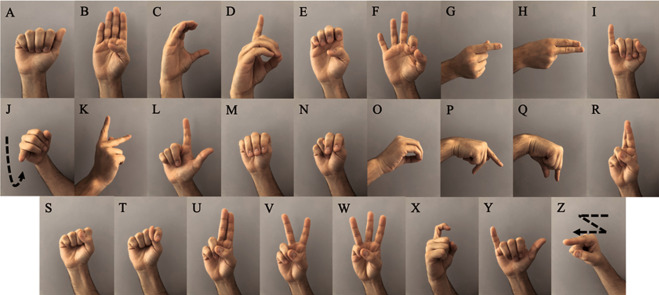

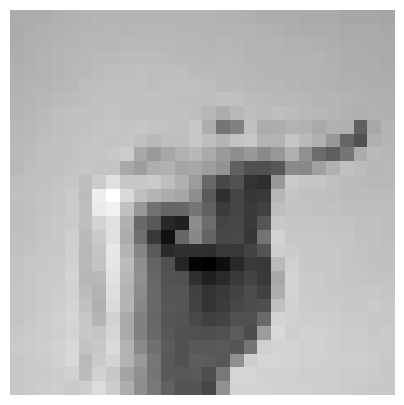

el valor predicho es: x el valor real es:t


In [538]:
idx = np.random.randint(len(y_test))
plot_number(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'el valor predicho es: {alphabet[pred]} el valor real es:{alphabet[y_test[idx]]}')

## **Conclussion**


Many of the ASL characters are very similar, taking as example characters M,N,S,T, they are all variants of closed fist. Considering images are only 28x28 pixels we can understand the model is not able to reach values higher than ~77%.

77% of 24 is 18, if we consider M,N,S,T as one, R,U as one, then we end up having 20 output classes, is we consider that we are able to correctly identify 18 cases we might consider we actually have 18/20 accuracy (90%) which is now more similar to MNIST example, also, there seems to be false positives in dataset.

False positive case



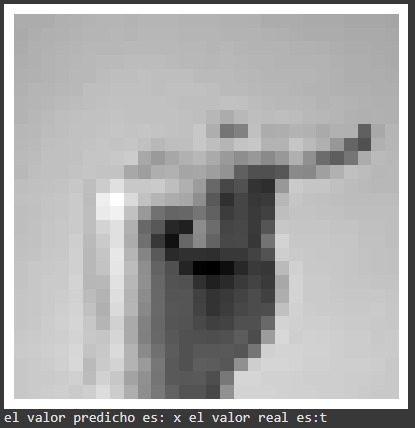